In [ ]:
import cv2
import numpy as np
import os
from skimage.morphology import convex_hull_image
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from PIL import Image

pic_target = "./result/"
cut_width = 28
cut_length = 28

picture = cv2.imread("example.png", 0)
(width, length) = picture.shape

pic = np.zeros((cut_width, cut_length))

num_width = int(width / cut_width)
num_length = int(length / cut_length)

for i in range(0, num_width):
    for j in range(0, num_length):
        pic = picture[i*cut_width : (i+1)*cut_width, j*cut_length : (j+1)*cut_length]
        pic = pic.astype(np.bool8)
        chull = convex_hull_image(pic)
        #chull_diff = img_as_float(chull.copy())
        result_path = pic_target + "{}_{}.png".format(i+1, j+1)
        chull = chull.astype(np.uint8)
        j = Image.fromarray(chull*255)
        j.save(result_path)

print("done!!")

In [ ]:
import os
pic_path = "./result/"
pic_target = "./picture/"

num_width_list = []
num_length_list = []

picture_names = os.listdir(pic_path)

img_1_1 = cv2.imread(pic_path + "1_1.png", 0)
(width, length) = img_1_1.shape

for picture_name in picture_names:
    num_width_list.append(int(picture_name.split("_")[0]))
    num_length_list.append(int(picture_name.split("_")[0]))

num_width = max(num_width_list)
num_length = max(num_length_list)

splicing_pic = np.zeros((num_width*width, num_length*length))

for i in range(1, num_width+1):
    for j in range(1, num_length+1):
        img_part = cv2.imread(pic_path + "{}_{}.png".format(i, j), 0)
        splicing_pic[width*(i-1) : width*i, length*(j-1) : length*j] = img_part

cv2.imwrite(pic_target + "result.png", splicing_pic)
print("done!")

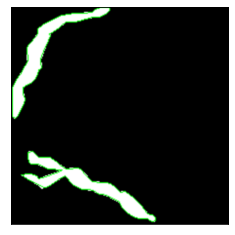

2
[83, 62]


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# find coutours with CHAIN_APPROX_TC89_L1

img = cv2.imread("picture/result.png")

imggray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, thresh = cv2.threshold(imggray, 127, 255, 0)

contours, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_KCOS) #CHAIN_APPROX_TC89_L1, CHAIN_APPROX_SIMPLE
mask = cv2.drawContours(img, contours, -1, (0, 255, 0), 1)
plt.imshow(mask, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
#cv2.namedWindow("drawContours", 0)
#cv2.imshow("drawContours", mask)
#cv2.waitKey()

print(len(contours))
print([len(a) for a in contours])

In [4]:
# calculate area and perimeter of coutours
area = cv2.contourArea(contours[0])
perimeter = cv2.arcLength(contours[0], True)
print(area, perimeter)
print(area*2.7*2.7)

print(contours[0])

1950.5 415.3164367675781
14219.145000000002
[[[ 17 150]]

 [[ 17 155]]

 [[ 18 160]]

 [[ 20 162]]

 [[ 27 162]]

 [[ 35 166]]

 [[ 38 167]]

 [[ 52 168]]

 [[ 46 171]]

 [[ 32 176]]

 [[ 30 176]]

 [[ 28 177]]

 [[ 27 175]]

 [[ 25 174]]

 [[ 23 173]]

 [[ 20 172]]

 [[ 14 172]]

 [[ 13 173]]

 [[ 10 173]]

 [[ 12 174]]

 [[ 17 178]]

 [[ 22 180]]

 [[ 27 183]]

 [[ 33 186]]

 [[ 35 186]]

 [[ 41 183]]

 [[ 51 176]]

 [[ 55 174]]

 [[ 59 178]]

 [[ 59 179]]

 [[ 64 184]]

 [[ 70 187]]

 [[ 73 188]]

 [[ 78 188]]

 [[ 84 189]]

 [[ 88 192]]

 [[ 91 193]]

 [[ 94 193]]

 [[ 97 194]]

 [[100 195]]

 [[109 200]]

 [[111 201]]

 [[113 206]]

 [[119 212]]

 [[122 214]]

 [[125 216]]

 [[127 217]]

 [[131 218]]

 [[140 218]]

 [[142 220]]

 [[145 221]]

 [[148 220]]

 [[148 217]]

 [[146 215]]

 [[144 214]]

 [[142 214]]

 [[140 213]]

 [[139 212]]

 [[134 205]]

 [[127 198]]

 [[121 193]]

 [[118 191]]

 [[116 190]]

 [[112 191]]

 [[106 185]]

 [[103 183]]

 [[101 182]]

 [[ 97 181]]

 [[ 